In [1]:
from utils.utils import *
from utils.Algorithms import *
from utils.GraphCreation import *
from utils.Metrics import *
import pandas as pd
np.random.seed(0)

In [2]:
def runResults(matrix, trueclusters, k, algorithms, metrics, mu_SCSR = 5):

    """
    Runs the algorithms and returns a dataframe with the results on the metrics
    
    Parameters
    ----------
    
    matrix (numpy.ndarray) Adjacency matrix of the graph
    true_clusters (list) List of the true clusters
    k (int) Number of target clusters
    algorithms (list) List of algorithms to run
    metrics (list) List of metrics to use

    Returns
    -------
    results (pandas.DataFrame) Dataframe with the results
    """

    results = pd.DataFrame(columns = ['Algorithm'] + [metric.__name__ for metric in metrics]+ ["Run Time"])

    for algorithm in algorithms:
        if algorithm.__name__ == 'SC_SR':
            predictions, run_time = algorithm(matrix, k, true_clusters = trueclusters, mu = mu_SCSR)
            new_line = [algorithm.__name__] + [round(metric(predictions, trueclusters), 2) for metric in metrics] + [round(run_time, 2)]
            results.loc[len(results.index)] = new_line
        else:
            predictions, run_time = algorithm(matrix, k)
            new_line = [algorithm.__name__] + [round(metric(predictions, trueclusters), 2) for metric in metrics] + [round(run_time, 2)]
            results.loc[len(results.index)] = new_line

    results.set_index('Algorithm', inplace = True)

    return results

In [3]:
algorithms = [SC_GED, SC_SR, SC_SUM, SC_AL]
metrics = [Purity, NMI, RI]

In [6]:
#On peut faire des seuils pour la connection entre potes
#par exemple
HIGH = 0.8
MEDIUM = 0.5
LOW = 0.3

# Simple Two-Layer Graph

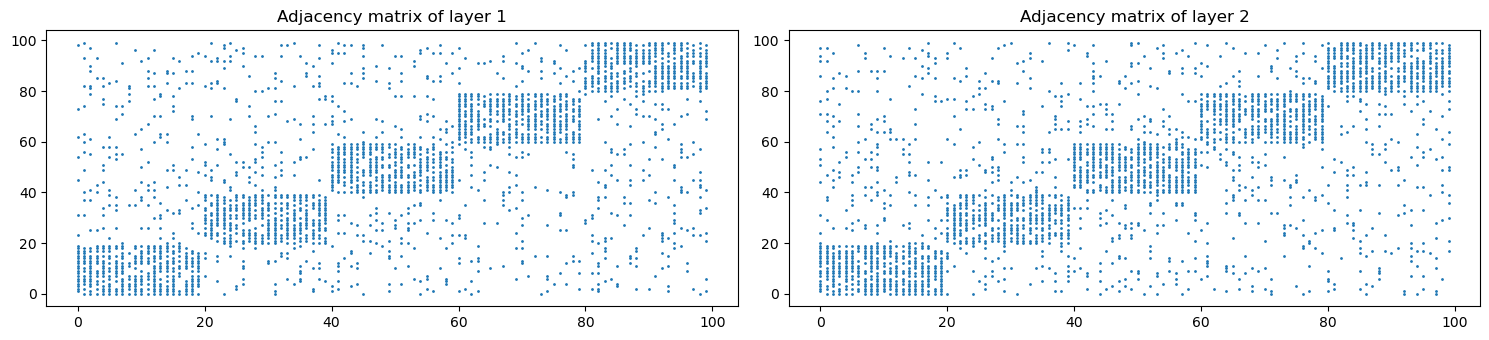

True assignment  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


,Purity,NMI,RI,Run Time
Algorithm,,,,
SC_GED,1.0,1.0,1.0,3.42
SC_SR,1.0,1.0,1.0,0.17
SC_SUM,1.0,1.0,1.0,0.00
SC_AL,1.0,1.0,1.0,0.03
CoR,1.0,1.0,1.0,10.35


In [5]:
n = 100
M = 2
k = 5

p = HIGH
delta = 0.7 #should be between 0 and p ; on peut le varier varier pour avoir une courbe

prob = np.full((k,M), p)
prob_prime = np.full((k,k,M), p-delta)
clusters_size = k*[20]

matrix,true_clusters = graphCreation(n,M,k,clusters_size,prob,prob_prime, plot_adj = True)
print("True assignment ", true_clusters)
results = runResults(matrix, true_clusters, k, algorithms, metrics)
results

# More complicated

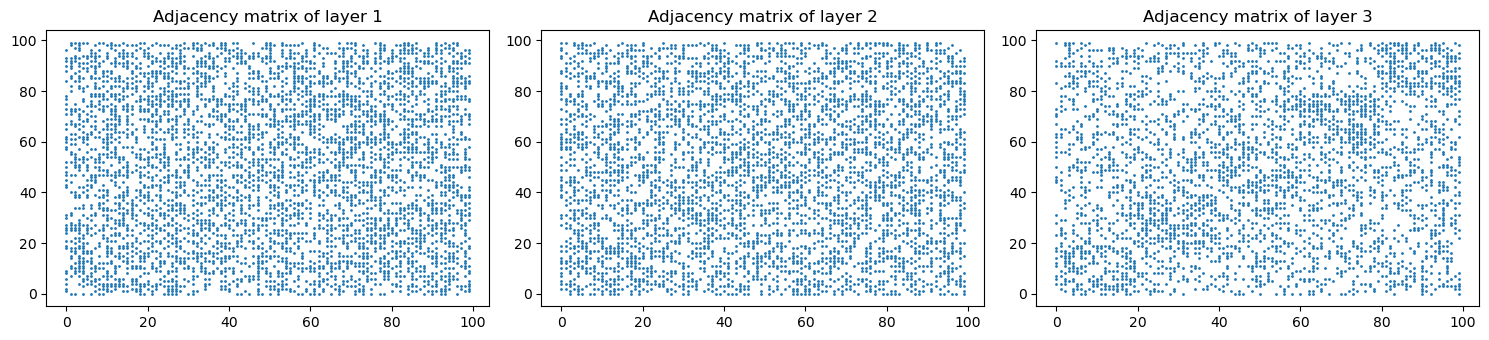

,Purity,NMI,RI,Run Time
Algorithm,,,,
SC_GED,0.29,0.03,0.67,2.40
SC_SR,0.35,0.12,0.70,0.10
SC_SUM,0.50,0.22,0.72,0.00
SC_AL,0.56,0.30,0.76,0.04
CoR,0.31,0.06,0.69,6.42


In [6]:
n = 100
M = 3
k = 5

p = MEDIUM

prob = np.full((k,M),0.5)
#prob[:,2] = np.array(k*[0.8])
#prob[:,3] = np.array(k*[0.8])


prob_prime1 = np.full((k,k),0.4)
prob_prime2 = np.full((k,k),0.4)
#prob_prime3 = np.full((k,k),0.8)
#prob_prime4 = np.full((k,k),0.8)
prob_prime5 = np.full((k,k),0.3)

prob_prime = np.stack((prob_prime1,prob_prime2,prob_prime5),axis=2)
clusters_size = k*[20]

matrix,index_cluster = graphCreation(n,M,k,clusters_size,prob,prob_prime, plot_adj = True)

results = runResults(matrix, true_clusters, k, algorithms, metrics)
results

-Lorsque la premiere couche est + informative que les autres : SC_GED, CoR sont a peu pres égaux, et meilleurs que les 2 autres.

- 5 couches très peu informatives (0.4 contre .35) SC_GED surpassé par SC_SUM (logique, mais pas de bcp).

- 10 couches très peu informatives, même résultat, l'écart ne se creuse pas forcément bcp.

- 3 couches, informatives de manière différente. SC_GED et CoR équivalents, un peu devant les autres mais pas bcp

- 5 couches informatives de manière différente, même constat

- 2 couches de bruit parmi 5 couches. SC_AL, SC_SUM meilleur que les deux autres (et plutot de bcp). (0.38,0.51,0.7,0.35).

- on enlève ces 2 couches de bruits : SC_SUM et SC_AL ont leur résultats qui augmentent (bcp pour le premier), SC_GED inchangé.



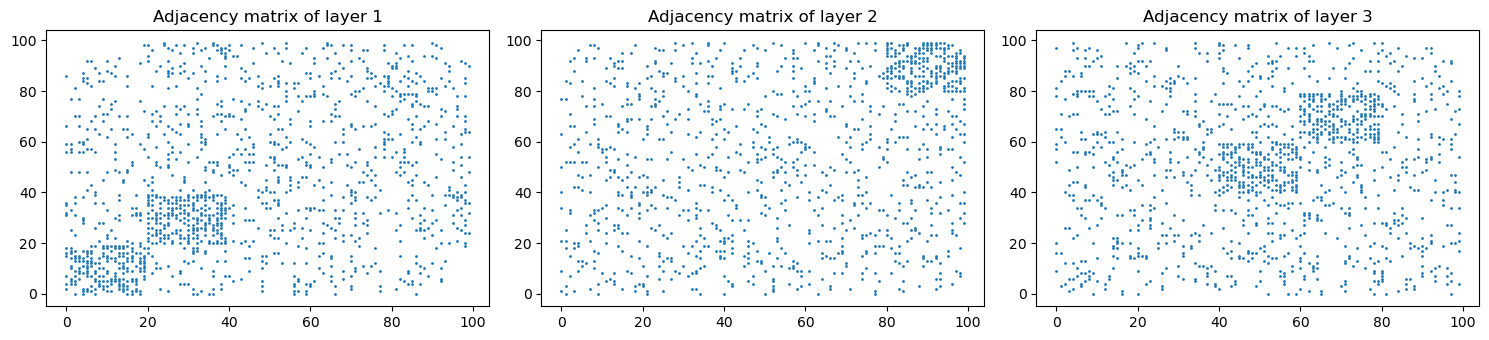

,Purity,NMI,RI,Run Time
Algorithm,,,,
SC_GED,0.58,0.39,0.78,2.47
SC_SR,0.53,0.29,0.76,0.10
SC_SUM,0.72,0.61,0.85,0.00
SC_AL,0.46,0.21,0.72,0.03
CoR,0.53,0.35,0.77,6.61


In [11]:
n = 100
M = 3
k = 5

p = MEDIUM

prob = np.full((k,M),0.5)
prob[:,2] = np.array([0.1, 0.1, 0.5, 0.5, 0.1])
prob[:,1] = np.array([0.1, 0.1, 0.1, 0.1, 0.5])
prob[:,0] = np.array([0.5, 0.5, 0.1, 0.1, 0.1]) #dans la couche, proba que deux mecs du cluster i soient liés


prob_prime1 = np.full((k,k),0.1) #matrice symétrique ; proba que un mec dans i et un mec dans j soient liés
prob_prime2 = np.full((k,k),0.1)
prob_prime3 = np.full((k,k),0.1)

prob_prime = np.stack((prob_prime1,prob_prime2,prob_prime3),axis=2) #shape k,k,M
clusters_size = k*[20]

matrix,index_cluster = graphCreation(n,M,k,clusters_size,prob,prob_prime, plot_adj = True)

results = runResults(matrix, true_clusters, k, algorithms, metrics)
results

# M times the "same" layer

We want here to study the asymptotic behaviour of our different algorithms when $M \rightarrow \infty$ at $\delta$ fixed ; and conversely, at M fixed, the asymptotic behaviour when $\delta \rightarrow 0$. Each layer is generated with the same parameter: each layer conveys the same type of information.

## Fine-tuning of the parameter $\mu = 1/ \lambda$ in SC-SR

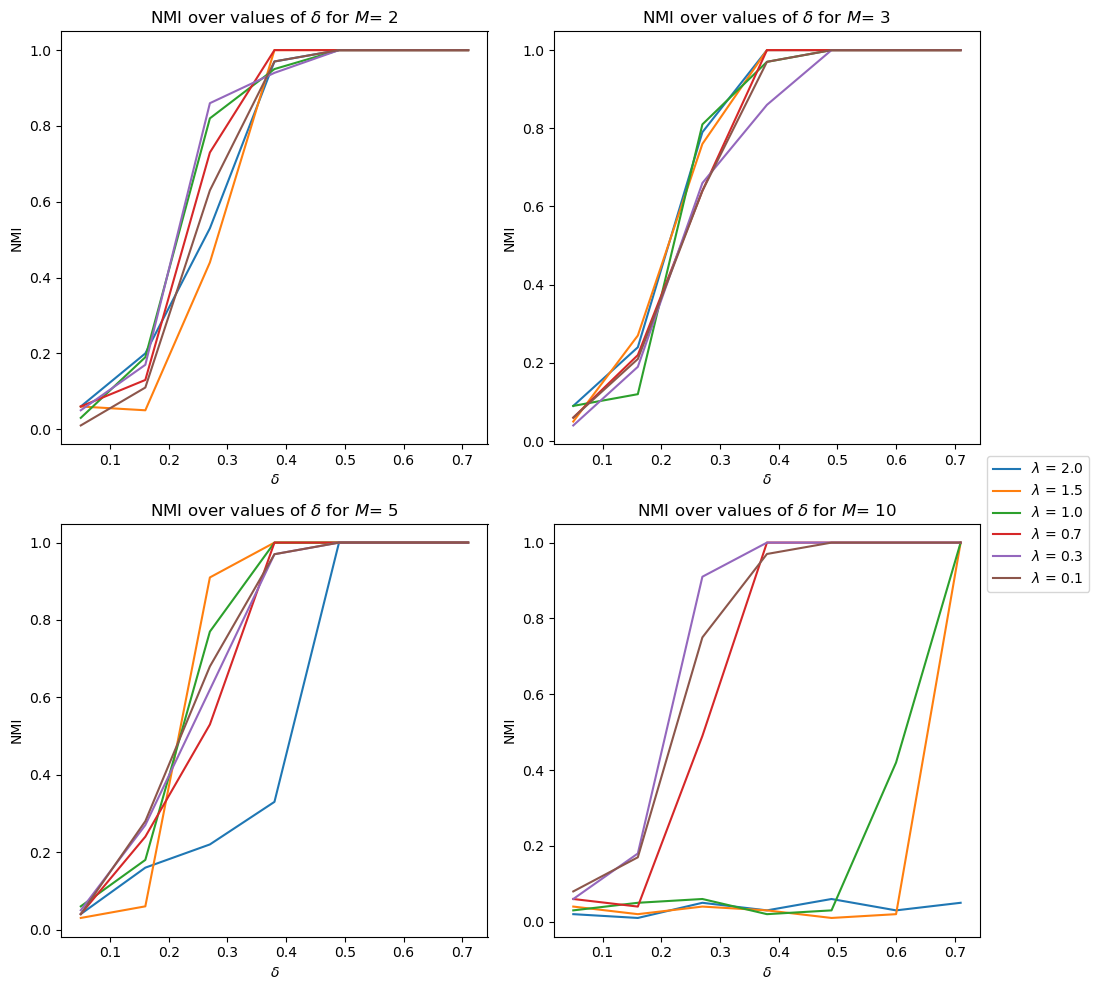

In [10]:
p = HIGH
n = 100
k = 4

mus = [0.5, 2/3, 1, 1.5, 3, 10]
deltas = np.arange(0.05, p, 0.11)
Ms = [2, 3, 5, 10]

all_res = {}
plt.subplots(figsize = (10, 10))
for idx, M in enumerate(Ms):
    plt.subplot(2, 2, Ms.index(M)+1)
    for mu in mus:
        res = []
        for delta in deltas:
            prob = np.full((k,M), p)
            prob_prime = np.full((k,k,M), p-delta)
            clusters_size = k*[n //k]

            matrix,true_clusters = graphCreation(n,M,k,clusters_size,prob,prob_prime, plot_adj = False)
            predictions, run_time = SC_SR(matrix, k, true_clusters = true_clusters, mu = mu)
            
            res.append(round(NMI(predictions, true_clusters), 2))

        plt.plot(deltas, res, label = r'$\lambda$ = {}'.format(round(1/mu, 1)))

    plt.title(r'NMI over values of $\delta$ for $M$= {}'.format(M))
    plt.xlabel(r'$\delta$')

    plt.ylabel('NMI')

plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 1))
plt.show()

    
    


## Benchmark

In [11]:
n = 100
p = HIGH
k = 4


algorithms = [SC_GED, SC_SR, SC_SUM, SC_AL, CoR]
metrics = [Purity, NMI, RI]

Ms = [2, 3, 5, 10]
deltas = np.arange(0.05, p, 0.11)
all_res = {}

for M in Ms:
    for delta in deltas:
        prob = np.full((k,M), p)
        prob_prime = np.full((k,k,M), p-delta)
        clusters_size = k*[n //k]

        matrix,true_clusters = graphCreation(n,M,k,clusters_size,prob,prob_prime, plot_adj = False)
        results = runResults(matrix, true_clusters, k, algorithms, metrics, mu_SCSR = 3)
        print("M = ", M, "delta = ", delta)
        print(results)
        print("\n")
        all_res[M, delta] = results



M =  2 delta =  0.05
           Purity   NMI    RI  Run Time
Algorithm                              
SC_GED       0.37  0.10  0.63      3.25
SC_SR        0.37  0.07  0.63      0.08
SC_SUM       0.30  0.03  0.50      0.00
SC_AL        0.36  0.03  0.63      0.04
CoR          0.31  0.02  0.63      6.87


M =  2 delta =  0.16
           Purity   NMI    RI  Run Time
Algorithm                              
SC_GED       0.38  0.09  0.65      1.00
SC_SR        0.53  0.26  0.70      0.07
SC_SUM       0.40  0.17  0.55      0.00
SC_AL        0.57  0.33  0.71      0.03
CoR          0.34  0.03  0.63      6.66


M =  2 delta =  0.27
           Purity   NMI    RI  Run Time
Algorithm                              
SC_GED       0.50  0.18  0.68      0.99
SC_SR        0.86  0.65  0.88      0.07
SC_SUM       0.94  0.83  0.94      0.00
SC_AL        0.98  0.94  0.98      0.03
CoR          0.41  0.11  0.66      6.47


M =  2 delta =  0.38
           Purity   NMI    RI  Run Time
Algorithm                     

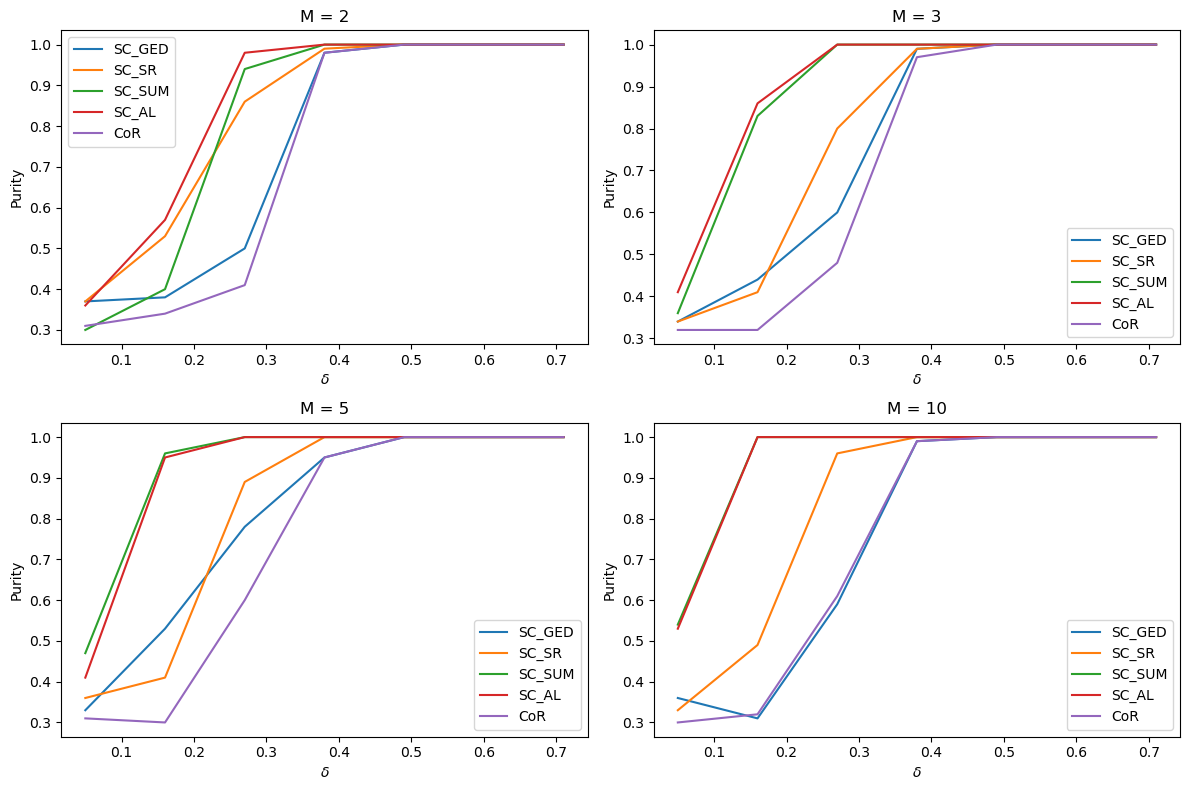

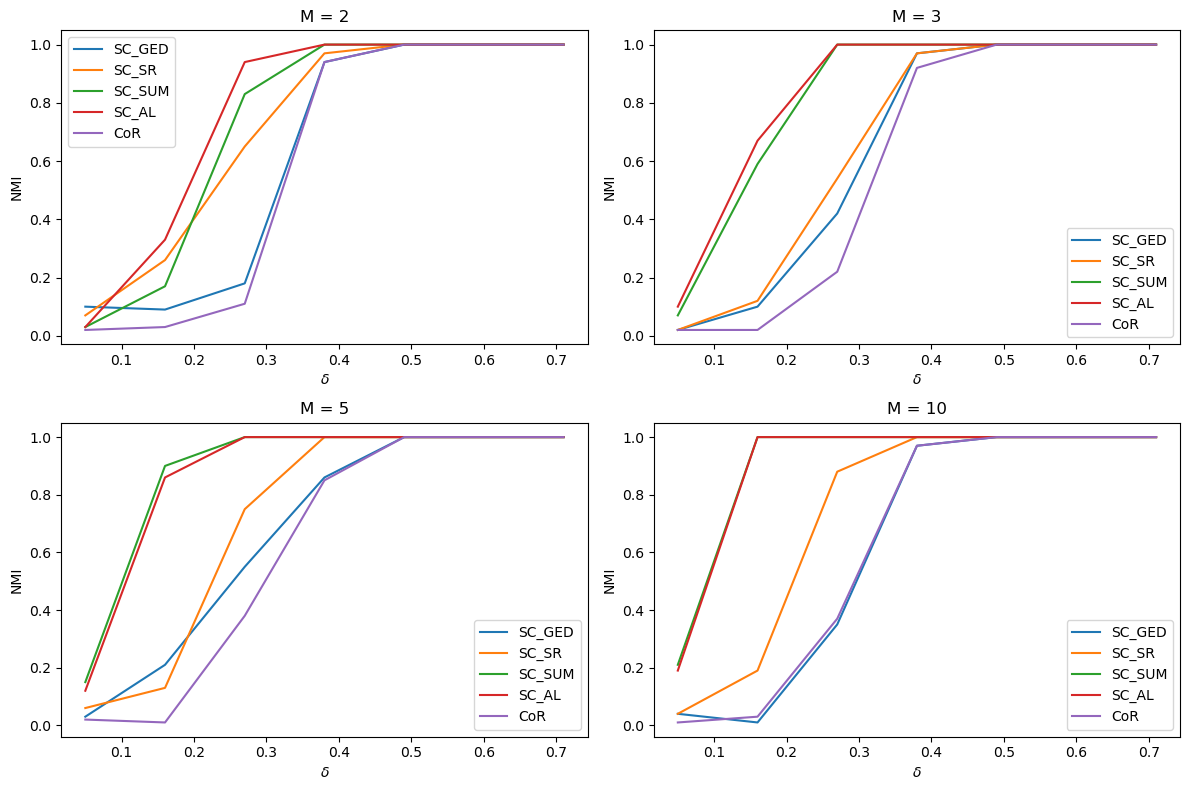

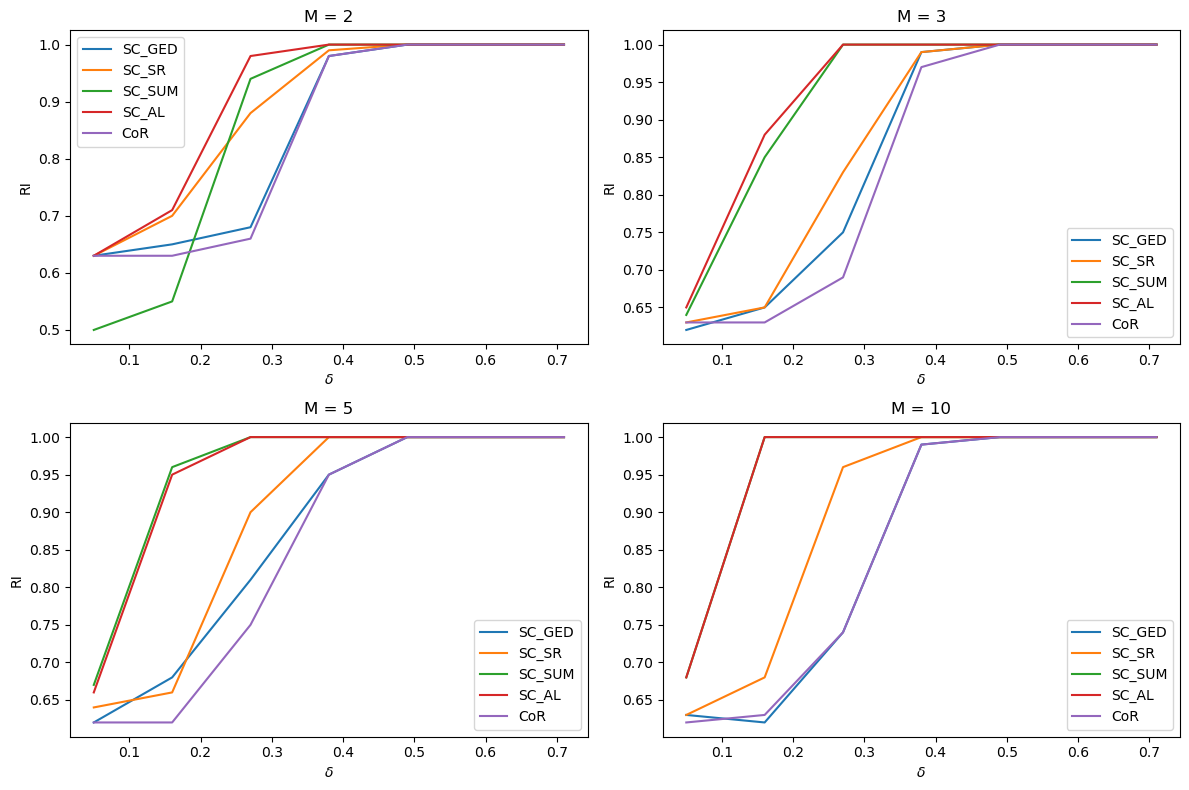

In [12]:
for metric in metrics:   
    plt.figure(figsize = (12, 8))
    for i, M in enumerate(Ms):
        plt.subplot(2, 2, i+1)
        for algorithm in algorithms:
            data = [all_res[M, delta][metric.__name__].loc[algorithm.__name__] for delta in deltas]
            plt.plot(deltas, data, label = algorithm.__name__)

        plt.title("M = " + str(M))
        plt.xlabel(r"$\delta$")
        plt.ylabel(metric.__name__)
        plt.legend()

    plt.tight_layout()
    plt.show()


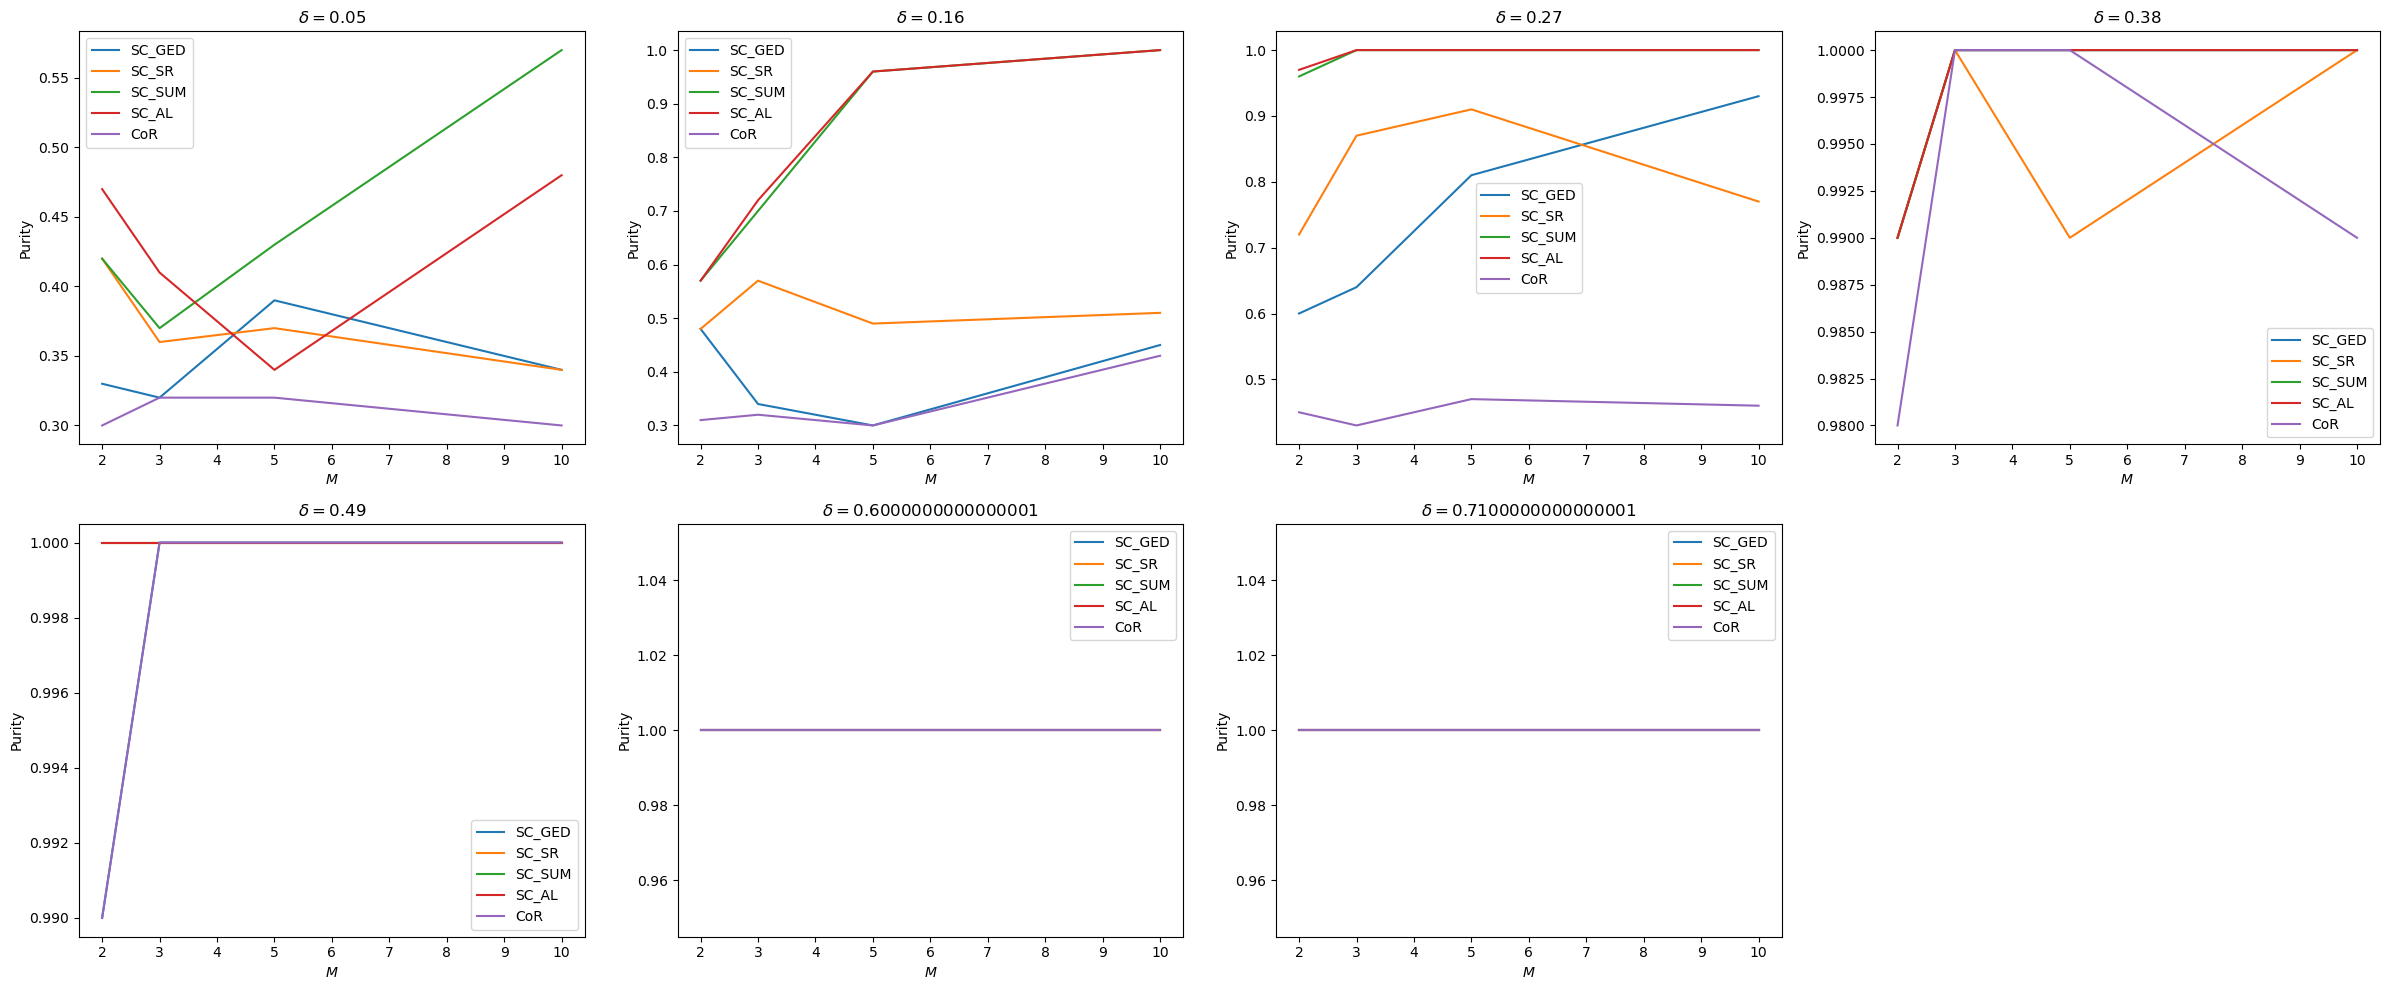

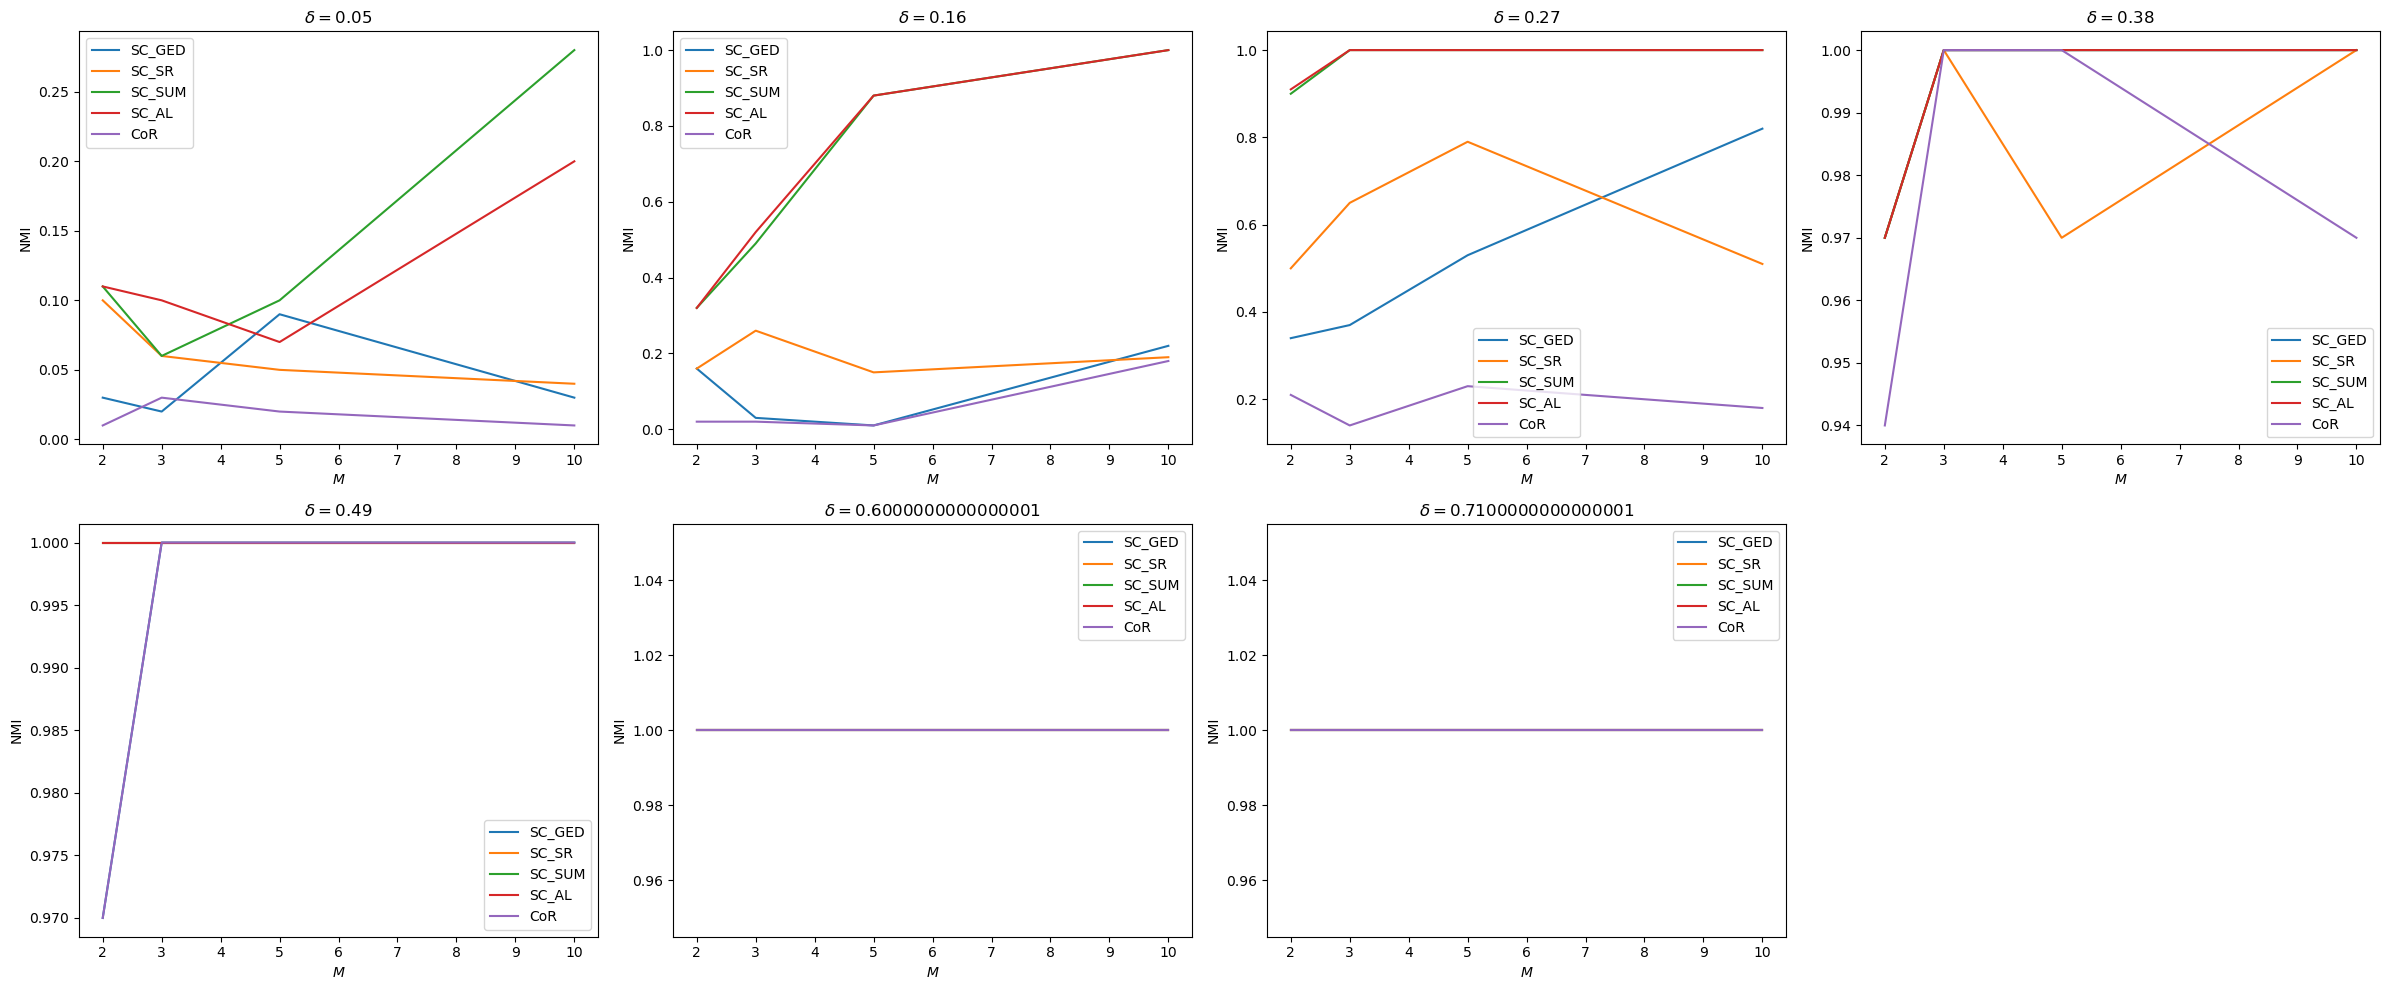

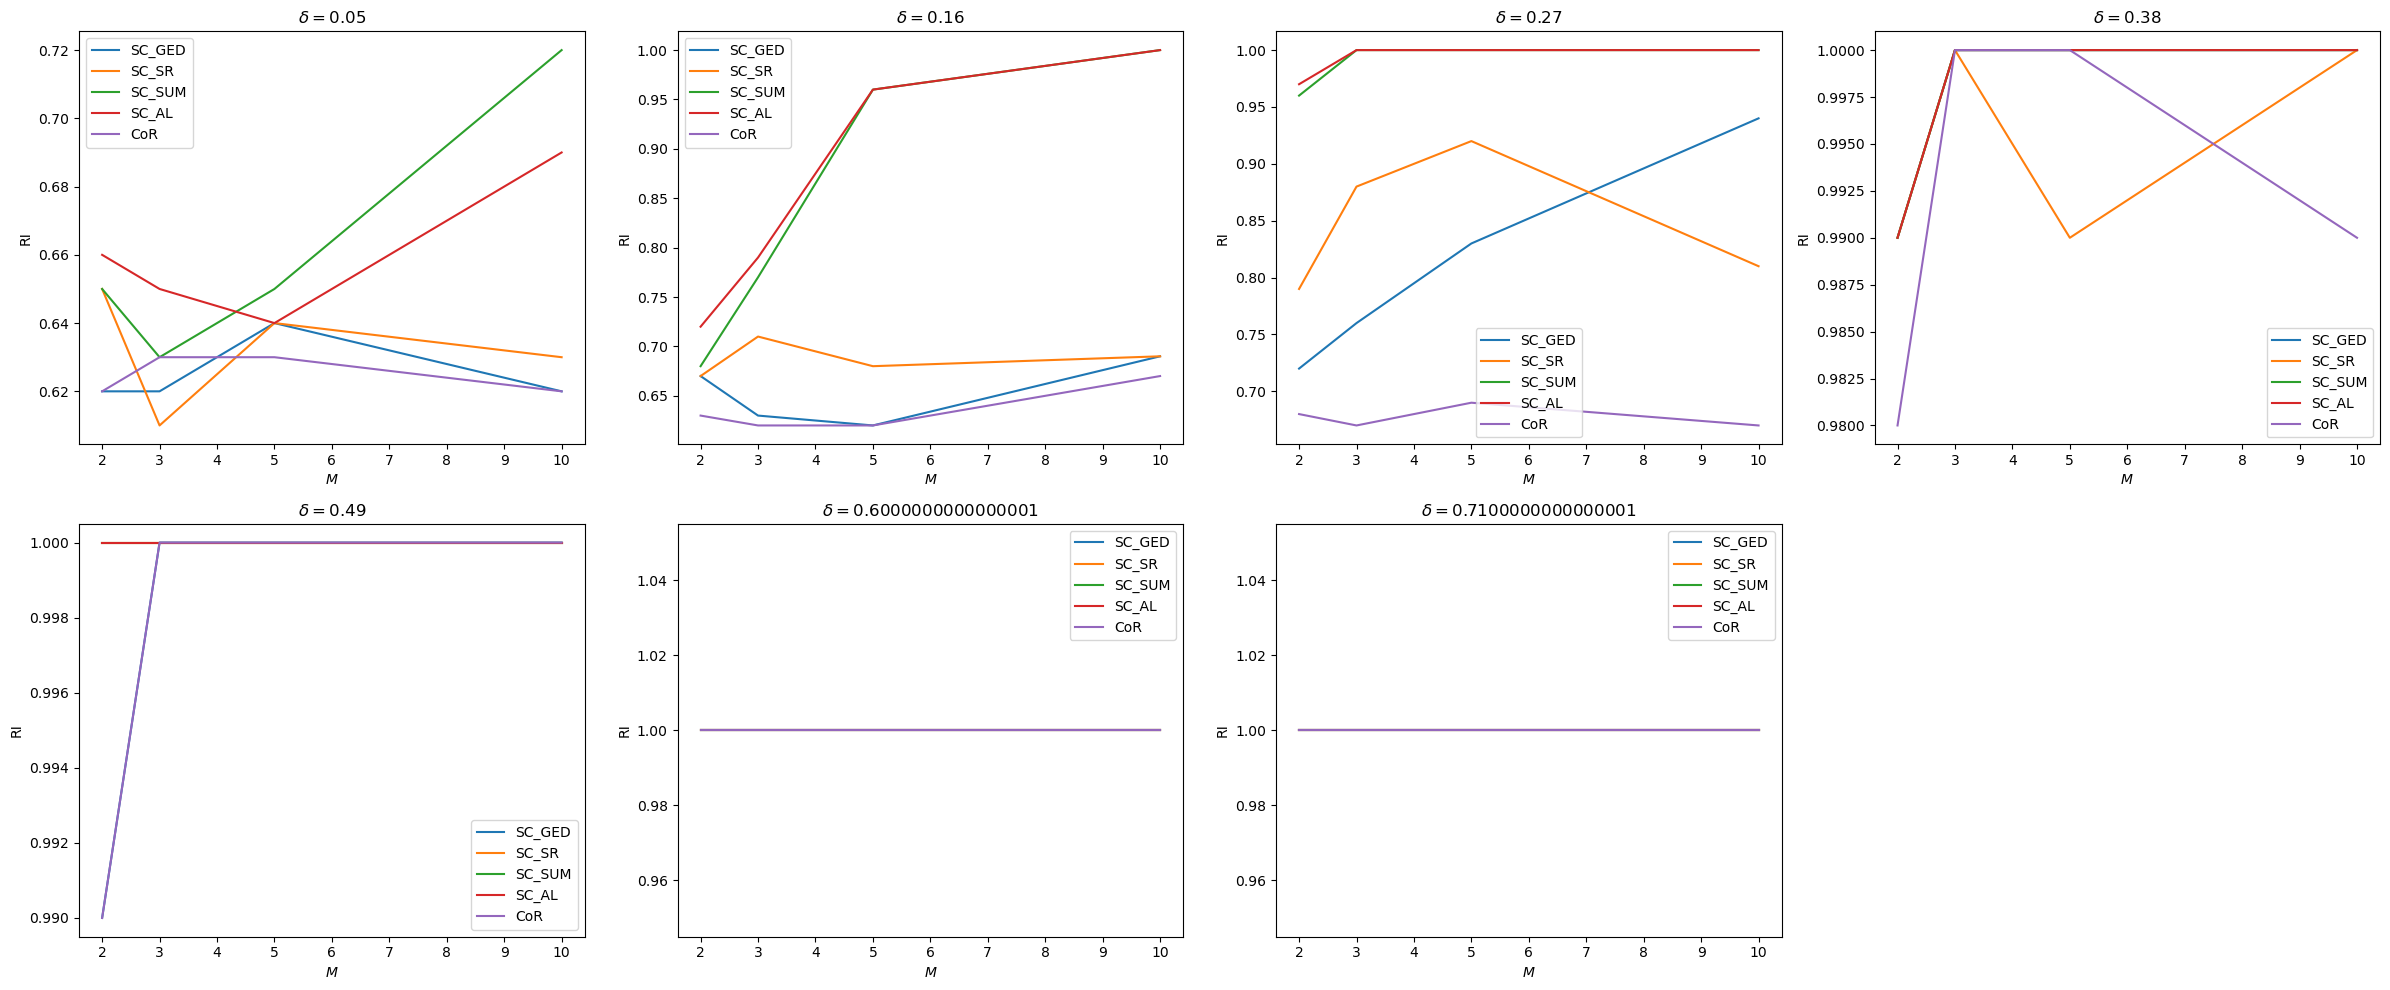

In [41]:
for metric in metrics:   
    plt.figure(figsize = (24, 10))
    for i in range(len(deltas)):
        plt.subplot(2, 4, i+1)
        delta = deltas[i]
        for algorithm in algorithms:
            data = [all_res[M, delta][metric.__name__].loc[algorithm.__name__] for M in Ms]
            plt.plot(Ms, data, label = algorithm.__name__)

        plt.title(r"$\delta = $" + str(delta))
        plt.xlabel(r"$M$")
        plt.ylabel(metric.__name__)
        plt.legend()

    plt.tight_layout()
    plt.show()

SC_AL and SC_SUM : kind of convergence when M is increasing, while the 3 others are decreasing ! They are getting better and better.
CoR in an underperformer, SC_SR struggles when M is increasing (leads before and gets behind SC_GED for M = 10).

--> SC_AL and SC_SUM are better for (over ?)-fitting ! in a very simple case

In terms of runtime, CoR is the worst. SC_GED gets terrible when M increases. 
